<h1><center>Cancer Death Rate</h1></center>

Source : [Cancer_reg](https://data.world/exercises/linear-regression-exercise-1)

## Libraries

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
from scipy import stats
from scipy.stats import norm, skew

from sklearn.metrics import r2_score

## Load and about the dataset

In [ ]:
#load dataset
df=pd.read_csv('cancer_reg.csv')

In [ ]:
#shape
print("shape of the data ",df.shape)
df.head()

shape of the data  (3047, 33)


,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [ ]:
#about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [ ]:
df.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [ ]:
round(df.describe())

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.0,3047.0,3047.0,3047.0,3047.0,3047.0,3047.0,3047.0,3047.0,3047.0,...,2438.0,3047.0,3047.0,3047.0,3047.0,3047.0,3047.0,3047.0,3047.0,3047.0
mean,606.0,186.0,179.0,448.0,47063.0,102637.0,17.0,155.0,45.0,40.0,...,48.0,41.0,36.0,19.0,84.0,9.0,1.0,2.0,51.0,6.0
std,1416.0,504.0,28.0,55.0,12040.0,329059.0,6.0,530.0,45.0,5.0,...,10.0,9.0,8.0,6.0,16.0,15.0,3.0,4.0,7.0,2.0
min,6.0,3.0,60.0,201.0,22640.0,827.0,3.0,0.0,22.0,22.0,...,16.0,14.0,11.0,3.0,10.0,0.0,0.0,0.0,23.0,0.0
25%,76.0,28.0,161.0,420.0,38882.0,11684.0,12.0,0.0,38.0,36.0,...,41.0,34.0,31.0,15.0,77.0,1.0,0.0,0.0,48.0,5.0
50%,171.0,61.0,178.0,454.0,45207.0,26643.0,16.0,0.0,41.0,40.0,...,49.0,41.0,36.0,19.0,90.0,2.0,1.0,1.0,52.0,5.0
75%,518.0,149.0,195.0,481.0,52492.0,68671.0,20.0,84.0,44.0,42.0,...,56.0,48.0,42.0,23.0,95.0,11.0,1.0,2.0,55.0,6.0
max,38150.0,14010.0,363.0,1207.0,125635.0,10170292.0,47.0,9762.0,624.0,65.0,...,79.0,71.0,65.0,47.0,100.0,86.0,43.0,42.0,78.0,21.0


## EDA

In [ ]:
#checking for null values
df.isnull().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarri

In [ ]:
#columns with only missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().sum(), 4),  ' missing values')

pctsomecol18_24 2285  missing values
pctemployed16_over 152  missing values
pctprivatecoveragealone 609  missing values


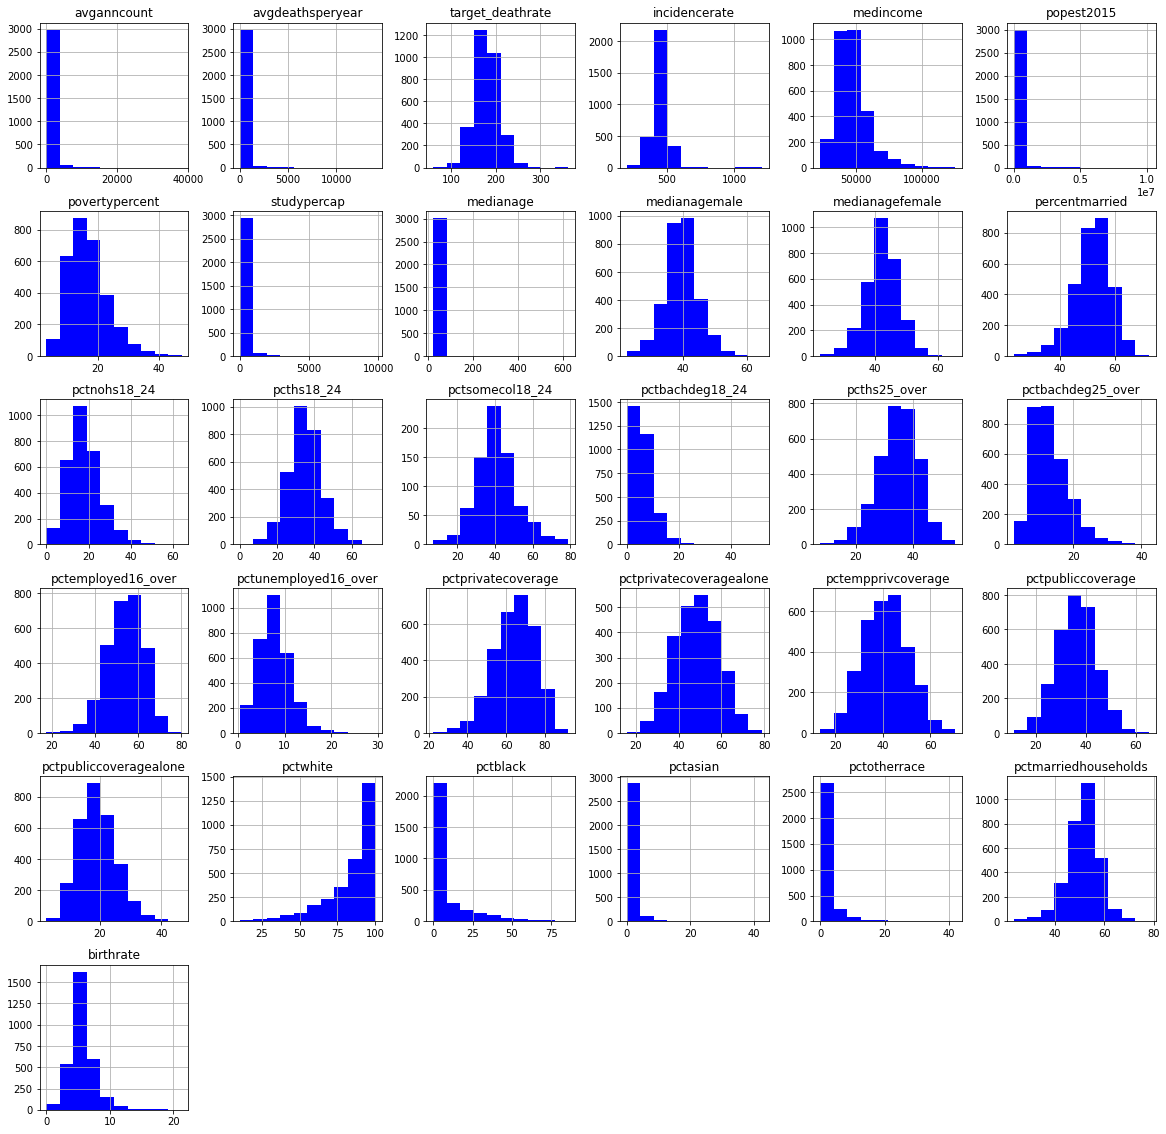

In [ ]:
#to see the distribution of the attributes
df.hist(figsize=(20,20), color='blue')
plt.show()

In [ ]:
#skewness
df.skew()

avganncount                10.680460
avgdeathsperyear           11.949188
target_deathrate            0.274724
incidencerate               0.771935
medincome                   1.408071
popest2015                 14.289926
povertypercent              0.930713
studypercap                 8.713690
medianage                   9.989944
medianagemale               0.132041
medianagefemale            -0.208384
percentmarried             -0.653487
pctnohs18_24                0.973345
pcths18_24                  0.179209
pctsomecol18_24             0.392411
pctbachdeg18_24             1.956201
pcths25_over               -0.333635
pctbachdeg25_over           1.094837
pctemployed16_over         -0.387649
pctunemployed16_over        0.891061
pctprivatecoverage         -0.393537
pctprivatecoveragealone    -0.009915
pctempprivcoverage          0.089416
pctpubliccoverage          -0.005436
pctpubliccoveragealone      0.470949
pctwhite                   -1.680904
pctblack                    2.258068
p

In [ ]:
# replacing those missing values with median values
df['pctsomecol18_24'].fillna(df['pctsomecol18_24'].median(), inplace=True)
df['pctemployed16_over'].fillna(df['pctemployed16_over'].median(), inplace=True)
df['pctprivatecoveragealone'].fillna(df['pctprivatecoveragealone'].median(), inplace=True)

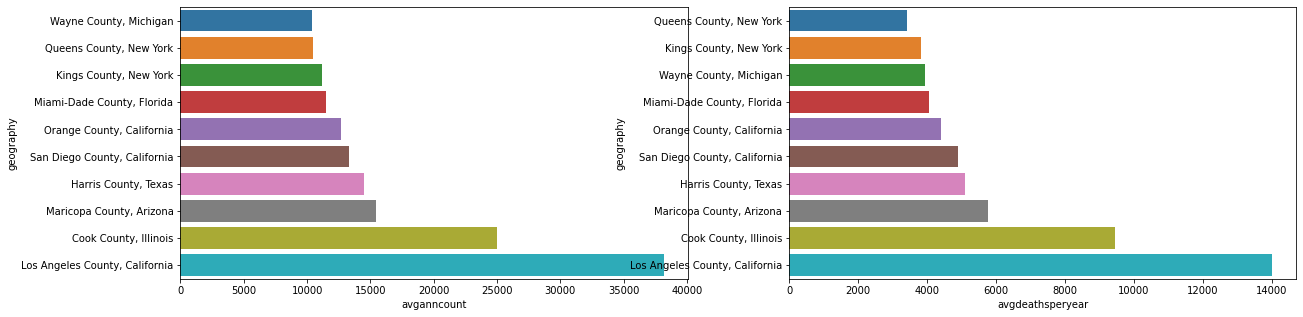

In [ ]:
#geography wise deathrate
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.barplot(ax=axes[0],x="avganncount",y='geography',data=df.sort_values('avganncount').tail(10))
sns.barplot(x="avgdeathsperyear",y='geography',data=df.sort_values('avgdeathsperyear').tail(10))

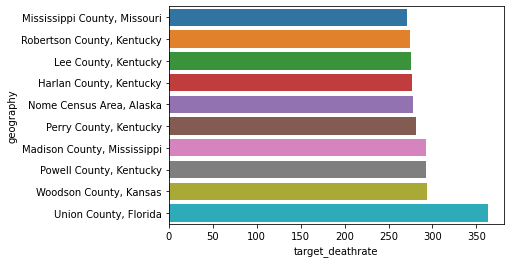

In [ ]:
sns.barplot(x="target_deathrate",y='geography',data=df.sort_values('target_deathrate').tail(10))

Union country, florida has the highest deathrate.

In [ ]:
## separating categorical and numerical

In [ ]:
categorical = df.select_dtypes(include="object").columns.to_list()
numerical = df.select_dtypes(exclude="object").columns.to_list()

In [ ]:
categorical

['binnedinc', 'geography']

In [ ]:
numerical

['avganncount',
 'avgdeathsperyear',
 'target_deathrate',
 'incidencerate',
 'medincome',
 'popest2015',
 'povertypercent',
 'studypercap',
 'medianage',
 'medianagemale',
 'medianagefemale',
 'percentmarried',
 'pctnohs18_24',
 'pcths18_24',
 'pctsomecol18_24',
 'pctbachdeg18_24',
 'pcths25_over',
 'pctbachdeg25_over',
 'pctemployed16_over',
 'pctunemployed16_over',
 'pctprivatecoverage',
 'pctprivatecoveragealone',
 'pctempprivcoverage',
 'pctpubliccoverage',
 'pctpubliccoveragealone',
 'pctwhite',
 'pctblack',
 'pctasian',
 'pctotherrace',
 'pctmarriedhouseholds',
 'birthrate']

<Figure size 1080x576 with 0 Axes>

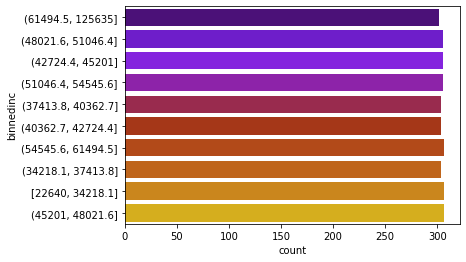

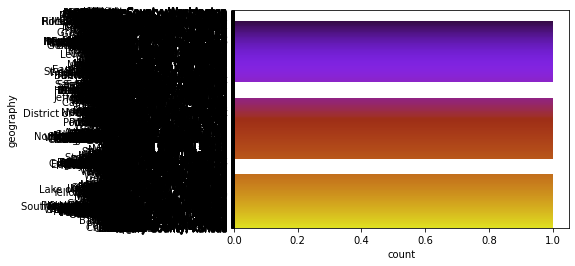

In [ ]:
##categorical 
plt.figure(figsize=(15,8))
for i in categorical:
  plt.figure(figsize=(6,4))
  sns.countplot(y=df[i] ,palette = 'gnuplot')

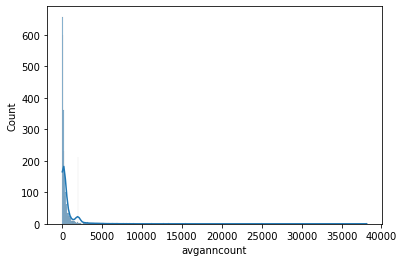

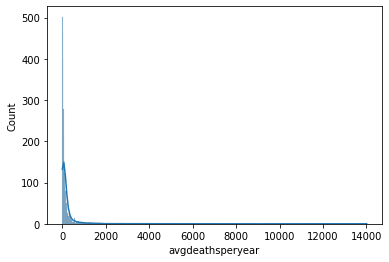

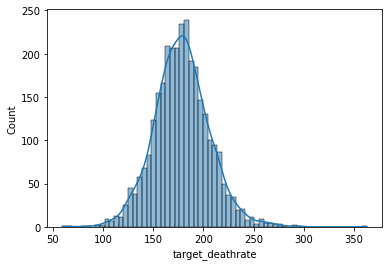

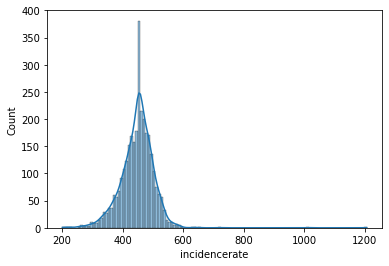

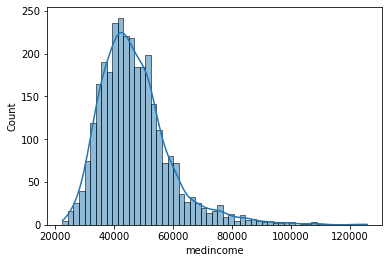

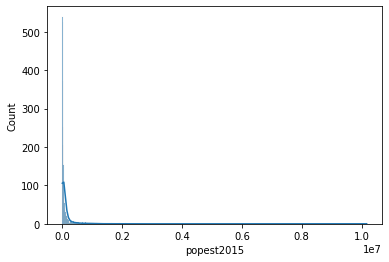

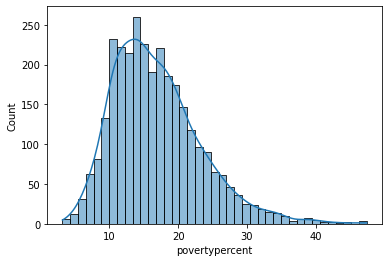

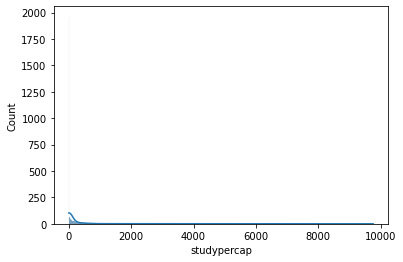

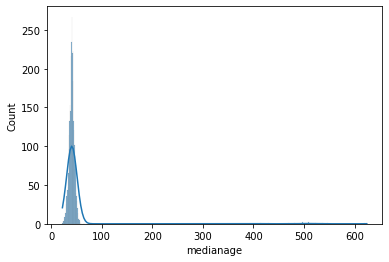

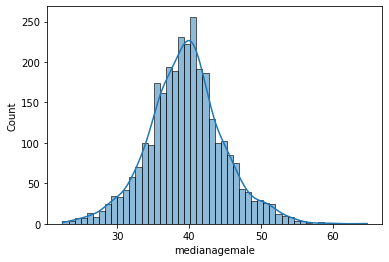

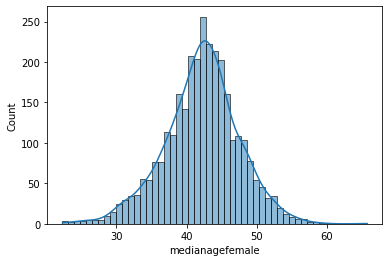

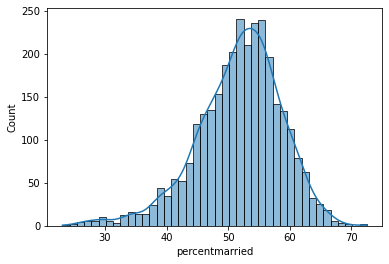

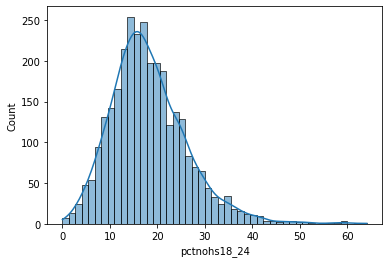

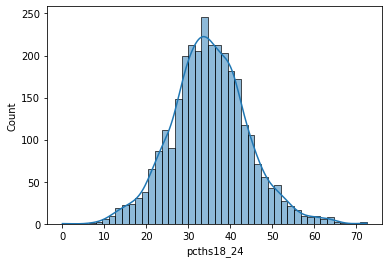

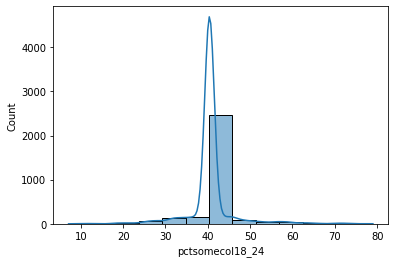

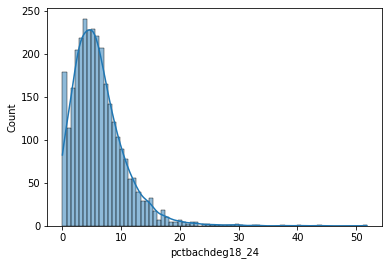

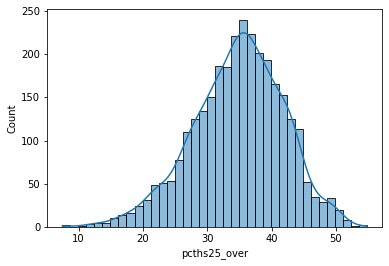

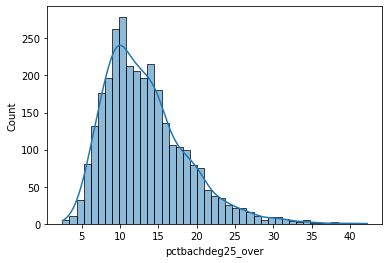

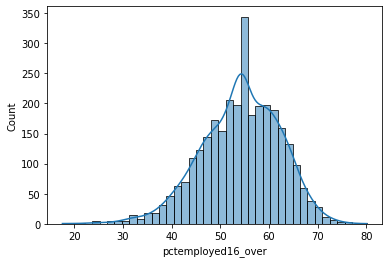

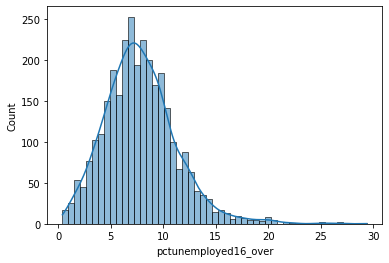

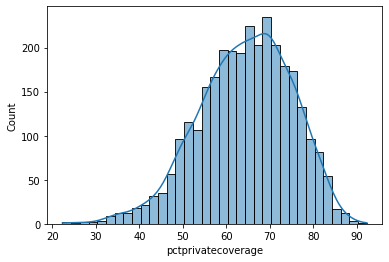

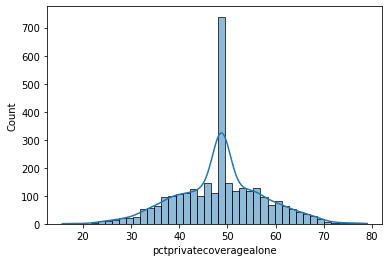

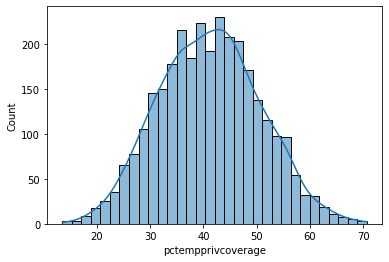

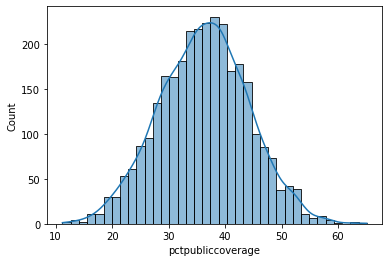

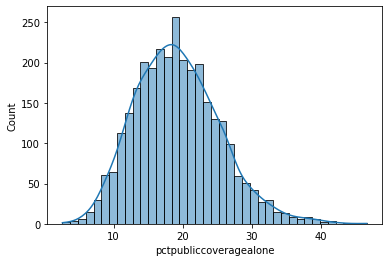

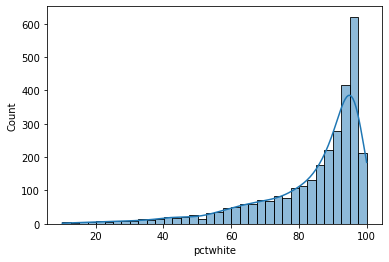

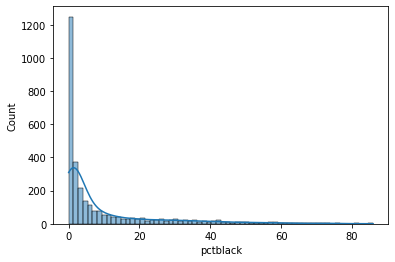

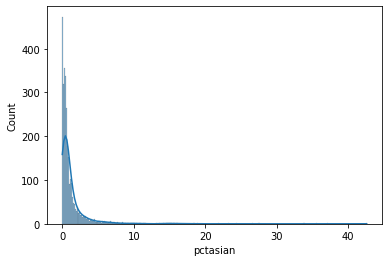

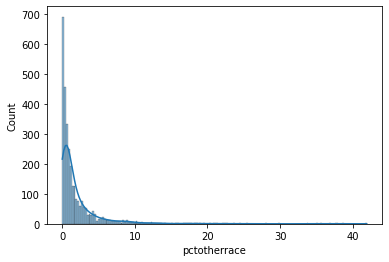

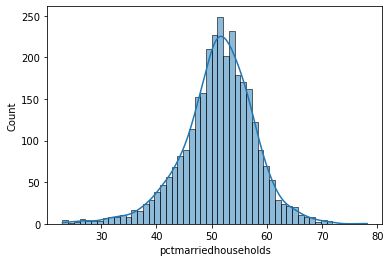

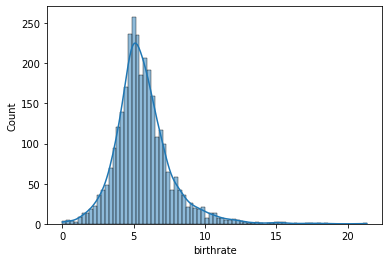

In [ ]:
for i in numerical:
    plt.figure(figsize=(6,4))
    sns.histplot(x=df[i],kde="True")

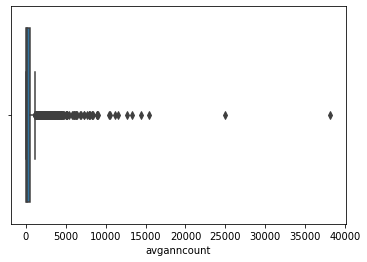

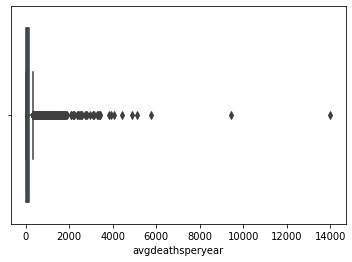

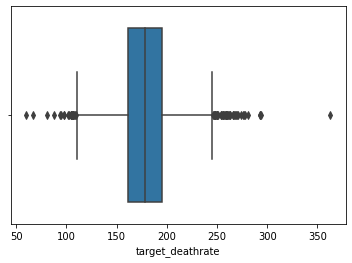

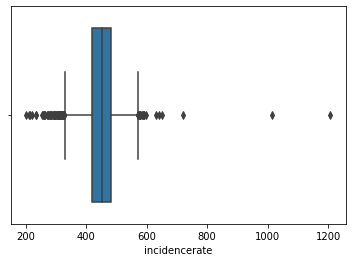

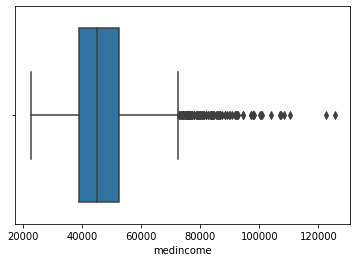

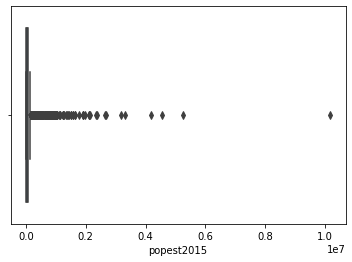

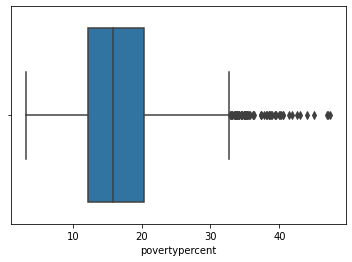

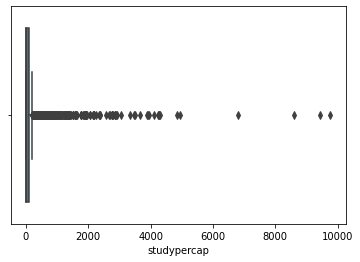

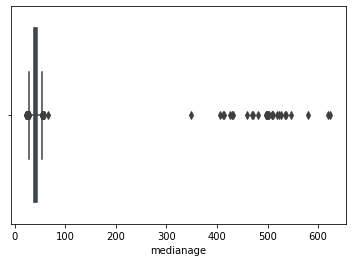

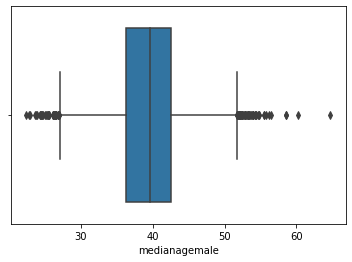

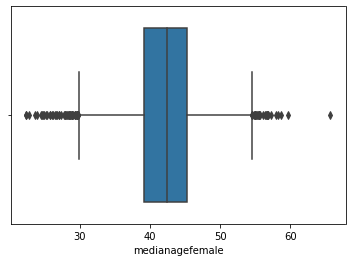

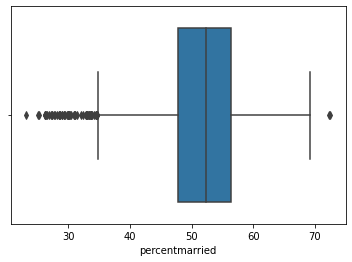

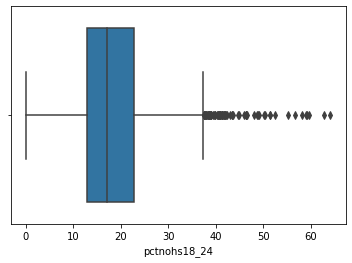

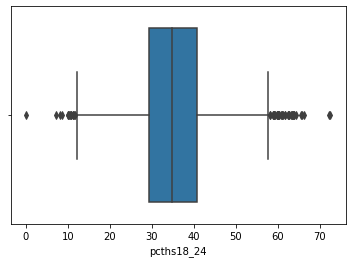

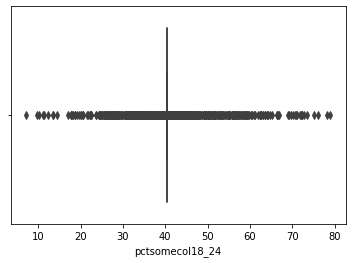

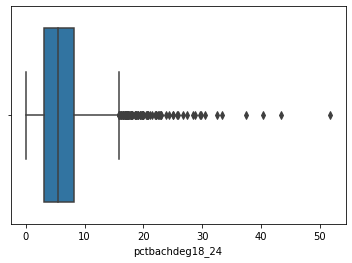

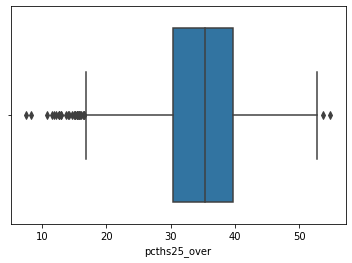

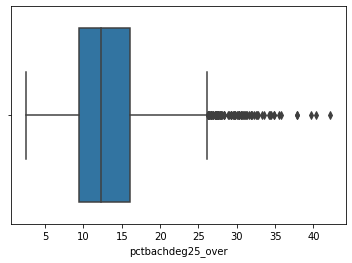

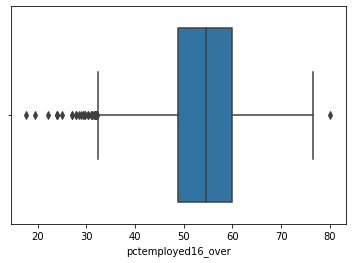

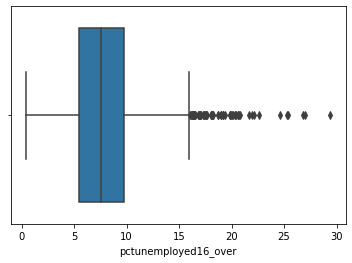

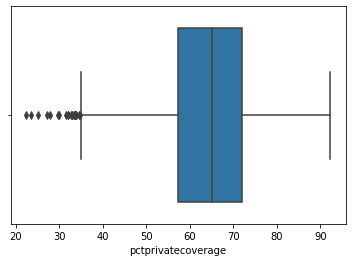

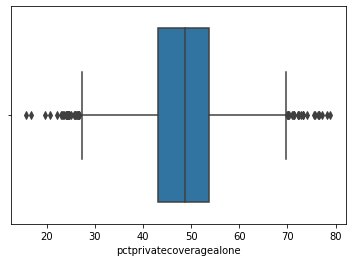

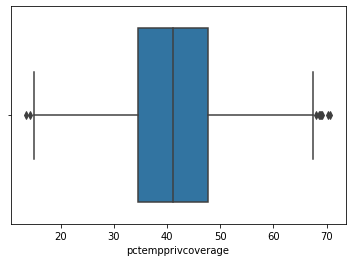

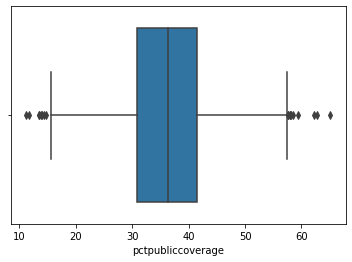

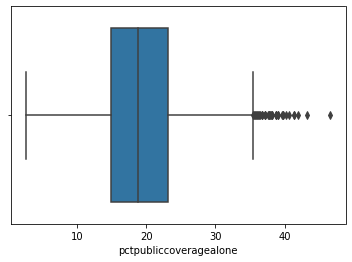

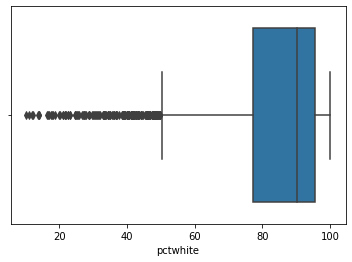

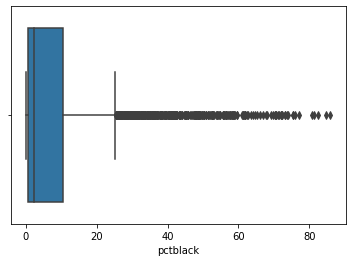

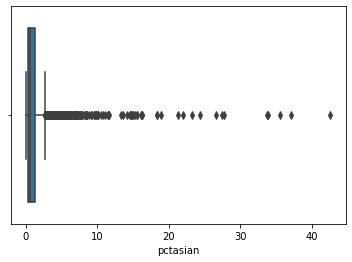

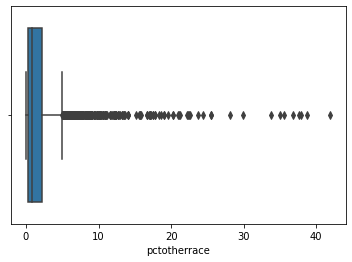

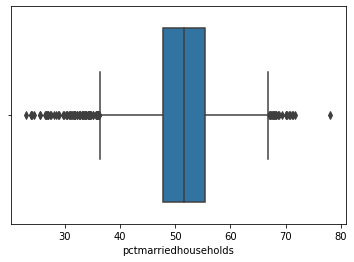

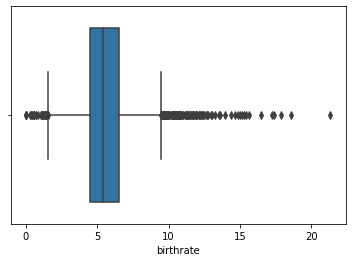

In [ ]:
for i in numerical:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[i])

From the above boxplot we can see the outliers. In that avganncount, avgdeathsperyear, popest2015, studypercap, median age, pctsomercol18_24, pctasian, pctotherrace have the high outliers.

In [ ]:
#From geography attribute we are creating the state and city attribute
df[['city','state']]= df['geography'].str.split(',', expand=True)

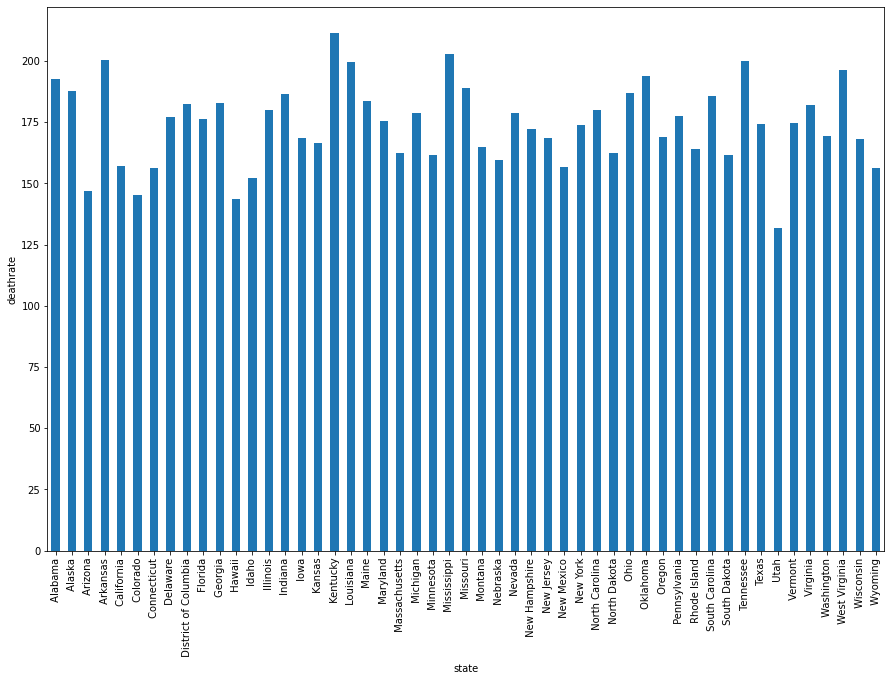

In [ ]:
plt.figure(figsize=(15,10))
df1=df.copy()
df1.groupby(df1.state)['target_deathrate'].median().plot.bar()
plt.xlabel('state')
plt.ylabel('deathrate')
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
df2=df.groupby(df.state)['incidencerate'].mean()
px.bar(df2, text_auto='.2s')

<Figure size 1440x720 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,10))
df2=df.groupby(df.state)['target_deathrate'].mean()
px.bar(df2, text_auto='.2s')

<Figure size 1440x720 with 0 Axes>

Kentucky state has the highest deathrate which has the value of 215.3158.

Text(0.5, 1.0, 'Death_rate')

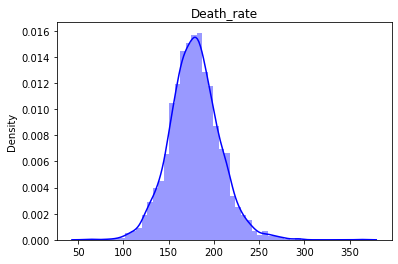

In [ ]:
## target deathrate
sns.distplot(x=df['target_deathrate'],color='blue',axlabel=False).set_title('Death_rate')

From the plot we can see that it is normally distributed. so we are taking log for the linear regression.

Text(0.5, 1.0, 'log(Death_rate)')

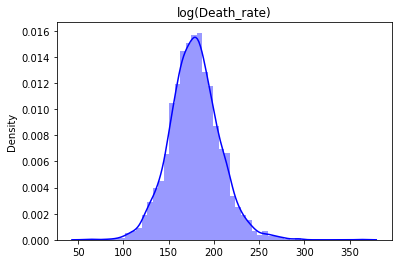

In [ ]:
df['Death_rate']=np.log1p(df['target_deathrate']) 
sns.distplot(a=df['target_deathrate'],color='blue',axlabel=False).set_title('log(Death_rate)') 

## correlation

In [ ]:
df.corr()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,Death_rate
avganncount,1.000000,0.939408,-0.143532,0.073553,0.269145,0.926894,-0.135694,0.082071,-0.024098,-0.124969,...,0.202349,-0.173548,-0.093699,-0.136501,0.031376,0.435071,0.209184,-0.106221,-0.034508,-0.133623
avgdeathsperyear,0.939408,1.000000,-0.090715,0.062690,0.223207,0.977634,-0.066918,0.063488,-0.024599,-0.148487,...,0.160124,-0.131687,-0.027338,-0.187159,0.084607,0.443074,0.215149,-0.160266,-0.074420,-0.080042
target_deathrate,-0.143532,-0.090715,1.000000,0.449432,-0.428615,-0.120073,0.429389,-0.022285,0.004375,-0.021929,...,-0.267399,0.404572,0.449358,-0.177400,0.257024,-0.186331,-0.189894,-0.293325,-0.087407,0.989866
incidencerate,0.073553,0.062690,0.449432,1.000000,-0.001036,0.026912,0.009046,0.077283,0.018089,-0.014733,...,0.149825,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181,0.452438
medincome,0.269145,0.223207,-0.428615,-0.001036,1.000000,0.235523,-0.788965,0.044003,-0.013288,-0.091663,...,0.747294,-0.754822,-0.719756,0.167225,-0.270232,0.425844,0.083635,0.446083,-0.010195,-0.416713
popest2015,0.926894,0.977634,-0.120073,0.026912,0.235523,1.000000,-0.065299,0.055722,-0.025219,-0.176608,...,0.158650,-0.160066,-0.041469,-0.190095,0.073044,0.464168,0.241468,-0.127979,-0.057740,-0.112253
povertypercent,-0.135694,-0.066918,0.429389,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.029280,-0.214001,...,-0.683100,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283,0.404717
studypercap,0.082071,0.063488,-0.022285,0.077283,0.044003,0.055722,-0.055652,1.000000,-0.026030,-0.036647,...,0.100063,-0.051497,-0.055512,0.023291,-0.019761,0.062543,-0.015247,-0.051736,0.010676,-0.016184
medianage,-0.024098,-0.024599,0.004375,0.018089,-0.013288,-0.025219,-0.029280,-0.026030,1.000000,0.129119,...,-0.036926,0.049060,-0.003298,0.035009,-0.017173,-0.038424,-0.030277,0.014504,-0.008276,0.004314
medianagemale,-0.124969,-0.148487,-0.021929,-0.014733,-0.091663,-0.176608,-0.214001,-0.036647,0.129119,1.000000,...,-0.208664,0.398967,0.002479,0.398044,-0.242748,-0.238322,-0.266655,0.222278,-0.104105,-0.024614


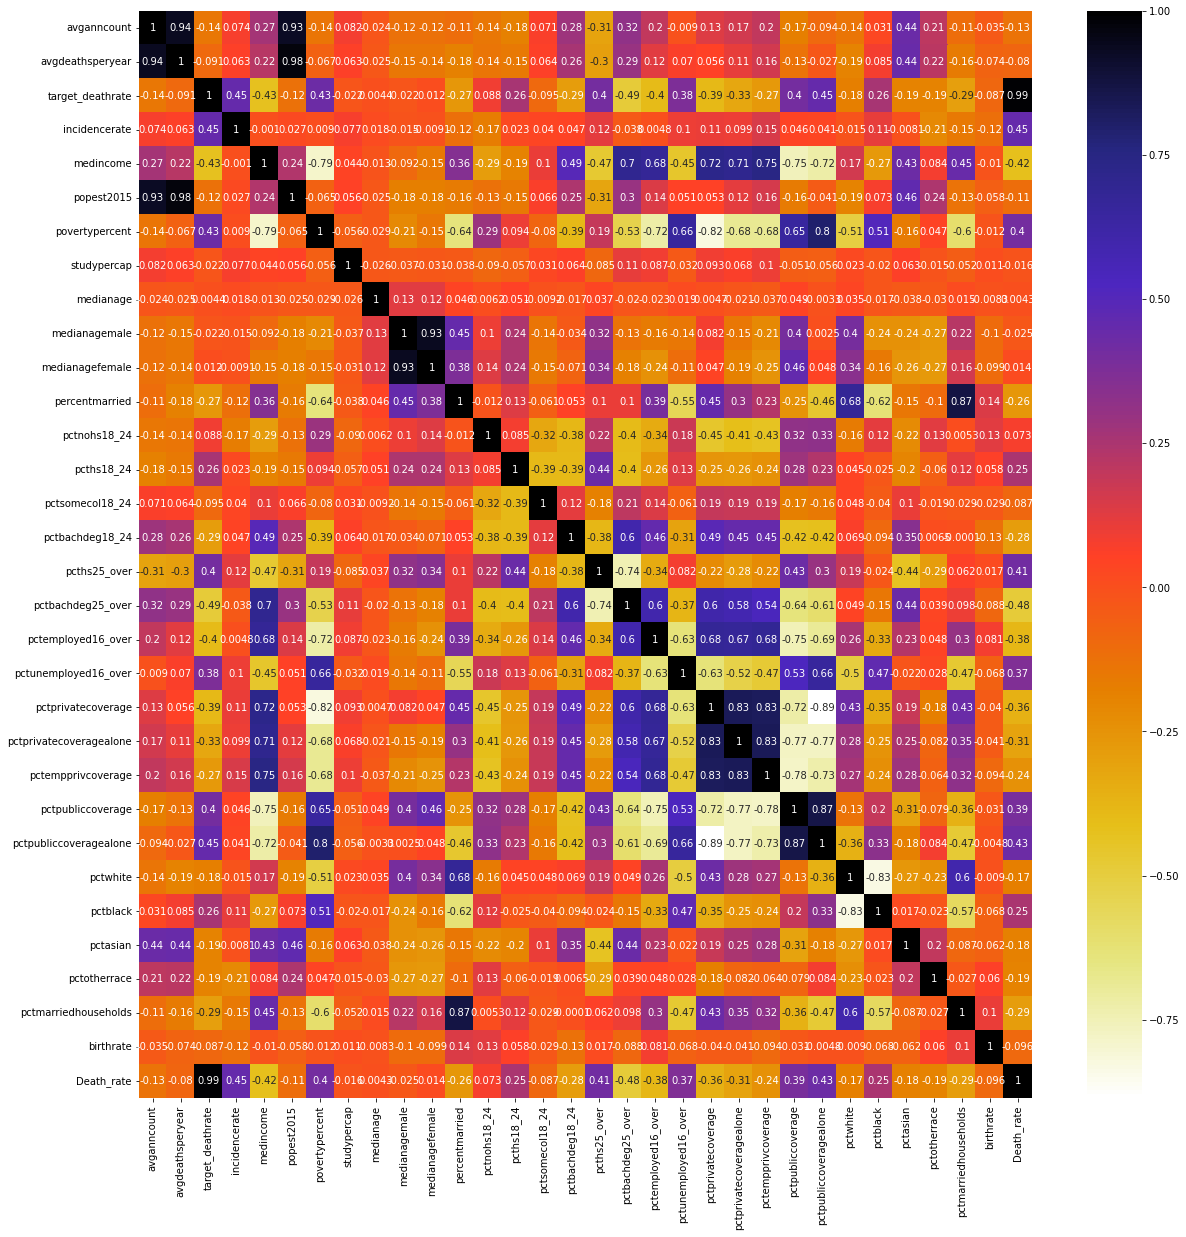

In [ ]:
plt.figure(figsize=(20,20))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

From the correlation we can see that there is no correlation between the target_deathrate and the other attributes. So we are taking all the attributes for the linear regression model to check whether it will give the accuracy or not.

In [ ]:
x=df.drop("target_deathrate",axis=1)
y=df["target_deathrate"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((2132, 35), (915, 35))

we cant able to create a model with the categorical values. So we are taking the numerical columns as separate thing.

In [ ]:
col_names=['avganncount',
 'avgdeathsperyear',
 'target_deathrate',
 'incidencerate',
 'medincome',
 'popest2015',
 'povertypercent',
 'studypercap',
 'medianage',
 'medianagemale',
 'medianagefemale',
 'percentmarried',
 'pctnohs18_24',
 'pcths18_24',
 'pctsomecol18_24',
 'pctbachdeg18_24',
 'pcths25_over',
 'pctbachdeg25_over',
 'pctemployed16_over',
 'pctunemployed16_over',
 'pctprivatecoverage',
 'pctprivatecoveragealone',
 'pctempprivcoverage',
 'pctpubliccoverage',
 'pctpubliccoveragealone',
 'pctwhite',
 'pctblack',
 'pctasian',
 'pctotherrace',
 'pctmarriedhouseholds',
 'birthrate']

new_data=df[col_names]

In [ ]:
x1 = new_data.drop('target_deathrate',axis=1)
print(x1)

      avganncount  avgdeathsperyear  incidencerate  medincome  popest2015  \
0     1397.000000               469     489.800000      61898      260131   
1      173.000000                70     411.600000      48127       43269   
2      102.000000                50     349.700000      49348       21026   
3      427.000000               202     430.400000      44243       75882   
4       57.000000                26     350.100000      49955       10321   
...           ...               ...            ...        ...         ...   
3042  1962.667684                15     453.549422      46961        6343   
3043  1962.667684                43     453.549422      48609       37118   
3044  1962.667684                46     453.549422      51144       34536   
3045  1962.667684                52     453.549422      50745       25609   
3046  1962.667684                48     453.549422      41193       37030   

      povertypercent  studypercap  medianage  medianagemale  medianagefemal

In [ ]:
y1 = new_data['target_deathrate']
print(y1)

0       164.9
1       161.3
2       174.7
3       194.8
4       144.4
        ...  
3042    149.6
3043    150.1
3044    153.9
3045    175.0
3046    213.6
Name: target_deathrate, Length: 3047, dtype: float64


In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=0)

print(y1.shape, y1_train.shape, y1_test.shape)

(3047,) (2132,) (915,)


In [ ]:
x1_train.shape,x1_test.shape

((2132, 30), (915, 30))

In [ ]:
reg_lin=LinearRegression()
reg_lin.fit(x1_train,y1_train)
pred=reg_lin.predict(x1_test)

Evaluating the models

In [ ]:
# MSE
print(np.sqrt(mean_squared_error(y1_test,pred)))

18.526018025730597


In [ ]:
# MAE 
print(mean_absolute_error(y1_test, pred))

13.951440911845745


In [ ]:
# RMSE
print(mean_squared_error(y1_test, pred, squared = False))

18.526018025730597


In [ ]:
# R2 score
print(r2_score(y1_test, pred))

0.5430397311965384


In [ ]:
# adjusted R2 score
def adjusted_r2_score(actual, predictions, num_pred, num_samples):
    n = num_samples
    k = num_pred
    r2 = r2_score(actual, predictions)
    adjusted_r2 = 1 - ((1-r2) * ((n-1)/(n-k-1)))
    return adjusted_r2


In [ ]:
# Initializing the model and fitting the model with train data
model = LinearRegression()
model.fit(x1_train,y1_train)

predictions = model.predict(x1_test)

In [ ]:
# Evaluating the model using Adjusted R² Evaluation Metric
num_samples = x_test.shape[0]
num_predictors = x_test.shape[1]
adjusted_r2_score(y1_test, predictions, num_predictors, num_samples)

0.5248444986503255

From the above model we get the 52% accuracy. So we are going the increase the percentage of that model by finding the relationship between those attributes and by gradient descent.

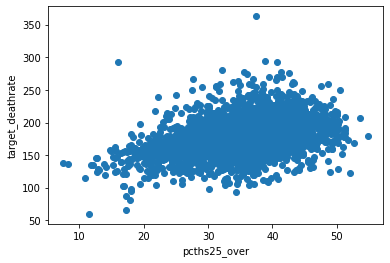

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df['pcths25_over'], y = df['target_deathrate'])
plt.ylabel('target_deathrate')
plt.xlabel('pcths25_over')
plt.show()

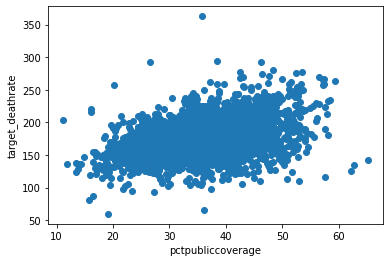

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df['pctpubliccoverage'], y = df['target_deathrate'])
plt.ylabel('target_deathrate')
plt.xlabel('pctpubliccoverage')
plt.show()

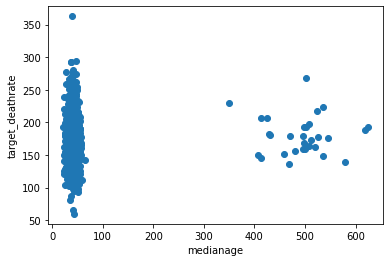

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df['medianage'], y = df['target_deathrate'])
plt.ylabel('target_deathrate')
plt.xlabel('medianage')
plt.show()

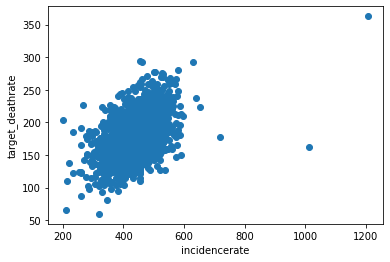

In [ ]:
# Finding the relationship between target_deathrate and other attributes

fig, ax = plt.subplots()
ax.scatter(x = df['incidencerate'], y = df['target_deathrate'])
plt.ylabel('target_deathrate')
plt.xlabel('incidencerate')
plt.show()

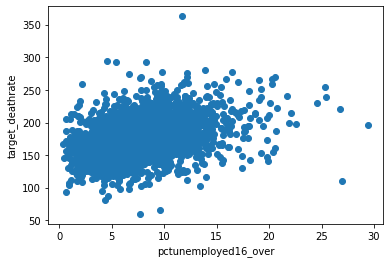

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df['pctunemployed16_over'], y = df['target_deathrate'])
plt.ylabel('target_deathrate')
plt.xlabel('pctunemployed16_over')
plt.show()

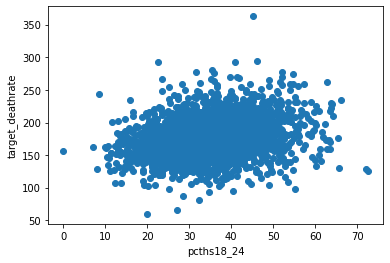

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df['pcths18_24'], y = df['target_deathrate'])
plt.ylabel('target_deathrate')
plt.xlabel('pcths18_24')
plt.show()

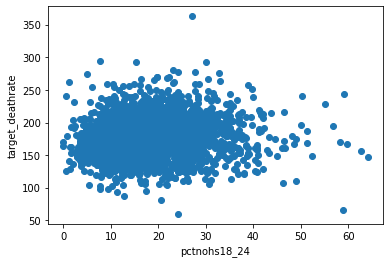

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df['pctnohs18_24'], y = df['target_deathrate'])
plt.ylabel('target_deathrate')
plt.xlabel('pctnohs18_24')
plt.show()

**Gradient descent**

Based upon the correlation we are taking the following attributes for the model.

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
reg_model2=['incidencerate','pcths18_24','pcths25_over','pctunemployed16_over','pctpubliccoverage','target_deathrate']

new_data1=df[reg_model2]

In [ ]:
x2 = new_data.drop('target_deathrate',axis=1)
print(x2)

      avganncount  avgdeathsperyear  incidencerate  medincome  popest2015  \
0     1397.000000               469     489.800000      61898      260131   
1      173.000000                70     411.600000      48127       43269   
2      102.000000                50     349.700000      49348       21026   
3      427.000000               202     430.400000      44243       75882   
4       57.000000                26     350.100000      49955       10321   
...           ...               ...            ...        ...         ...   
3042  1962.667684                15     453.549422      46961        6343   
3043  1962.667684                43     453.549422      48609       37118   
3044  1962.667684                46     453.549422      51144       34536   
3045  1962.667684                52     453.549422      50745       25609   
3046  1962.667684                48     453.549422      41193       37030   

      povertypercent  studypercap  medianage  medianagemale  medianagefemal

In [ ]:
y2 = new_data['target_deathrate']

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=0)


In [ ]:
reg_lin=LinearRegression()
reg_lin.fit(x2_train,y2_train)
pred=reg_lin.predict(x2_test)

In [ ]:
print(r2_score(y2_test, pred))

0.5430397311965384


In [ ]:
num_samples = x_test.shape[0]
num_predictors = x_test.shape[1]
adjusted_r2_score(y2_test, predictions, num_predictors, num_samples)

0.5248444986503255

In [ ]:
re_sdg=SGDRegressor()
re_sdg.fit(x2_train,y2_train)

SGDRegressor()

In [ ]:
train_mae=mean_absolute_error(y1,re_sdg.predict(x1))
print("mae of y1:",train_mae)
test_mae=mean_absolute_error(y2,re_sdg.predict(x2))
print("mae of y2:",test_mae)

mae of y1: 9.122746283080265e+18
mae of y2: 9.122746283080265e+18


In [ ]:
sgd_pl=Pipeline([("feature_scaling",StandardScaler()),("sgd",SGDRegressor())])
sgd_pl.fit(x2,y2)
train_mae=mean_absolute_error(y1,sgd_pl.predict(x1))
print("mae of y1:",train_mae)
test_mae=mean_absolute_error(y2,sgd_pl.predict(x2))
print("mae of y2:",test_mae)

mae of y1: 14.258846803997479
mae of y2: 14.258846803997479


Text(0.5, 1.0, 'learning curve=0.010000')

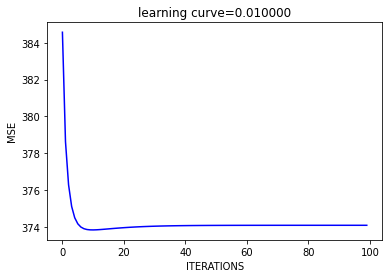

In [ ]:
eta0=1e-2
sgd_pl=Pipeline([("feature_scaling",StandardScaler()),("sgd",SGDRegressor(max_iter=1,tol=-np.infty,warm_start=True,random_state=42))])
loss=[]
for epoch in range(100):
    sgd_pl.fit(x2,y2)
    loss.append(mean_squared_error(y2,sgd_pl.predict(x2)))
plt.plot(np.arange(len(loss)),loss,'b-')
plt.xlabel('ITERATIONS')
plt.ylabel('MSE')
plt.title(f'learning curve={eta0:4f}')
    

Text(0.5, 1.0, 'learning curve=0.001000')

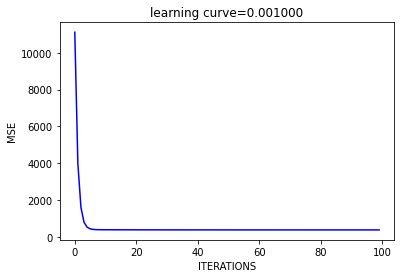

In [ ]:
eta0=1e-3
sgd_pl=Pipeline([("feature_scaling",StandardScaler()),("sgd",SGDRegressor(max_iter=1,tol=-np.infty,warm_start=True,eta0=eta0,random_state=42))])
loss=[]
for epoch in range(100):
    sgd_pl.fit(x2,y2)
    loss.append(mean_squared_error(y2,sgd_pl.predict(x2)))
plt.plot(np.arange(len(loss)),loss,'b-')
plt.xlabel('ITERATIONS')
plt.ylabel('MSE')
plt.title(f'learning curve={eta0:4f}')
    

In [ ]:
score=sgd_pl.score(x2,y2)
print("R2 is",score)

R2 is 0.5225580834181409


From the first model we get 0.5248444986503255, that is 52% accuracy. After the gradient descent we get the same 0.5225580834181409, that is 52% accuracy. 

In the first model I selected all those attributes for the train and test. In the 2nd model, based upon the correlation I selected the attributes for the features selection. Both of these models doesn't give the high accuracy.